In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [2]:
actions = ['head', 'shoulder', 'knee', 'clap', 'left_foot', 'right_foot', 'both_foot', 'yeah']

In [3]:
data = np.concatenate([np.load('dataset/seq_head_1673241839.npy'),
                       np.load('dataset/seq_head_1673241921.npy'),
                       np.load('dataset/seq_head_1673242031.npy'),
                       np.load('dataset/seq_head_1673242120.npy'),
                       np.load('dataset/seq_head_1673242219.npy'),  # head
                       np.load('dataset/seq_shoulder_1673242398.npy'),
                       np.load('dataset/seq_shoulder_1673242499.npy'),
                       np.load('dataset/seq_shoulder_1673242584.npy'),
                       np.load('dataset/seq_shoulder_1673242684.npy'),
                       np.load('dataset/seq_shoulder_1673242771.npy'),  # shoulder
                       np.load('dataset/seq_knee_1673242907.npy'),
                       np.load('dataset/seq_knee_1673243016.npy'),
                       np.load('dataset/seq_knee_1673243103.npy'),
                       np.load('dataset/seq_knee_1673243241.npy'),
                       np.load('dataset/seq_knee_1673243329.npy'),  # knee
                       np.load('dataset/seq_clap_1673243430.npy'),
                       np.load('dataset/seq_clap_1673243524.npy'),
                       np.load('dataset/seq_clap_1673243630.npy'),
                       np.load('dataset/seq_clap_1673243731.npy'),
                       np.load('dataset/seq_clap_1673243828.npy'),  # clap
                       np.load('dataset/seq_left_foot_1673243959.npy'),
                       np.load('dataset/seq_left_foot_1673244052.npy'),
                       np.load('dataset/seq_left_foot_1673244158.npy'),
                       np.load('dataset/seq_left_foot_1673244455.npy'),
                       np.load('dataset/seq_left_foot_1673244563.npy'),  # left_foot
                       np.load('dataset/seq_right_foot_1673244720.npy'),
                       np.load('dataset/seq_right_foot_1673244828.npy'),
                       np.load('dataset/seq_right_foot_1673244980.npy'),
                       np.load('dataset/seq_right_foot_1673245283.npy'),
                       np.load('dataset/seq_right_foot_1673245430.npy'),  # right_foot
                       np.load('dataset/seq_both_foot_1673245514.npy'),
                       np.load('dataset/seq_both_foot_1673245625.npy'),
                       np.load('dataset/seq_both_foot_1673245806.npy'),
                       np.load('dataset/seq_both_foot_1673245926.npy'),
                       np.load('dataset/seq_both_foot_1673246081.npy'),  # both_foot
                       np.load('dataset/seq_yeah_1673246156.npy'),
                       np.load('dataset/seq_yeah_1673246265.npy'),
                       np.load('dataset/seq_yeah_1673246421.npy'),
                       np.load('dataset/seq_yeah_1673246544.npy'),
                       np.load('dataset/seq_yeah_1673246671.npy'),  # yeah
                       ], axis=0)

In [4]:
data.shape

(36976, 30, 141)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

In [6]:
print(x_data.shape)
print(labels.shape)

(36976, 30, 140)
(36976,)


In [7]:
labels

array([0., 0., 0., ..., 7., 7., 7.])

In [8]:
y_data = to_categorical(labels, num_classes=len(actions))

In [9]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, stratified = y_data, random_state=2021)

In [11]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(33278, 30, 140) (33278, 8)
(3698, 30, 140) (3698, 8)


In [12]:
model = Sequential([LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
                    Dense(32, activation='relu'),
                    Dense(len(actions), activation='softmax')])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                52480     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
Total params: 54,824
Trainable params: 54,824
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15,
                    callbacks=[ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
                               ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')])

Epoch 1/15
1039/1040 [============================>.] - ETA: 0s - loss: 2.9664 - acc: 0.4599
Epoch 1: val_acc improved from -inf to 0.59438, saving model to models\model.h5
1040/1040 [==============================] - 19s 17ms/step - loss: 2.9649 - acc: 0.4600 - val_loss: 1.0804 - val_acc: 0.5944 - lr: 0.0010
Epoch 2/15
1039/1040 [============================>.] - ETA: 0s - loss: 2.5900 - acc: 0.4609
Epoch 2: val_acc did not improve from 0.59438
1040/1040 [==============================] - 17s 17ms/step - loss: 2.5898 - acc: 0.4608 - val_loss: 1.7746 - val_acc: 0.3916 - lr: 0.0010
Epoch 3/15
1039/1040 [============================>.] - ETA: 0s - loss: 1.5271 - acc: 0.4355
Epoch 3: val_acc did not improve from 0.59438
1040/1040 [==============================] - 18s 17ms/step - loss: 1.5268 - acc: 0.4355 - val_loss: 1.0982 - val_acc: 0.5703 - lr: 0.0010
Epoch 4/15
1039/1040 [============================>.] - ETA: 0s - loss: 16.5216 - acc: 0.5081
Epoch 4: val_acc did not improve from 0.5

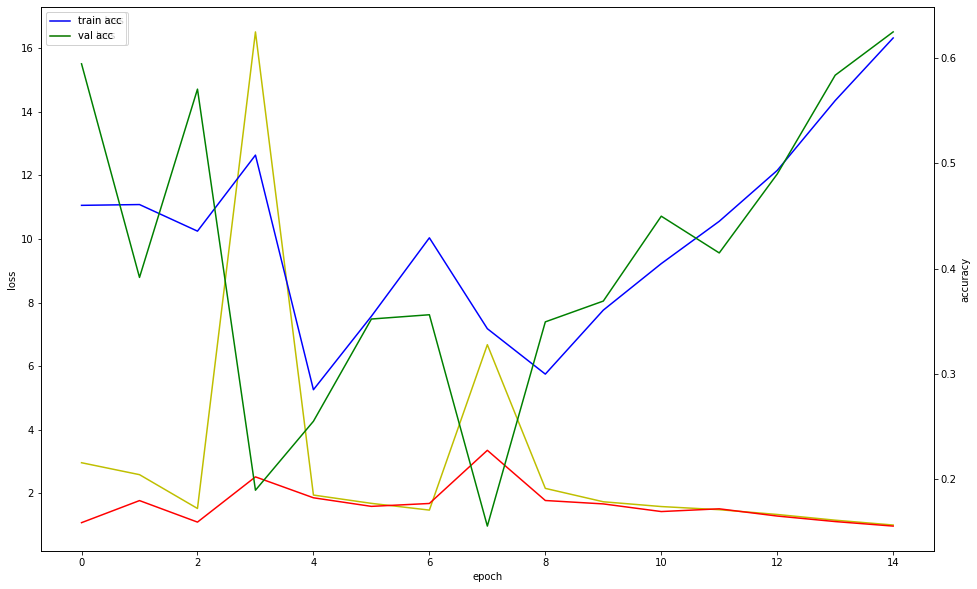

In [19]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [20]:
model = load_model('models/model.h5')

In [21]:
y_pred = model.predict(x_val)

116/116 [==============================] - 1s 7ms/step


In [22]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[3185,   59],
        [  69,  385]],

       [[3197,   10],
        [ 482,    9]],

       [[3089,  172],
        [  23,  414]],

       [[2528,  693],
        [ 114,  363]],

       [[3180,   58],
        [ 105,  355]],

       [[3174,   56],
        [ 110,  358]],

       [[3229,   36],
        [ 208,  225]],

       [[2916,  304],
        [ 277,  201]]], dtype=int64)